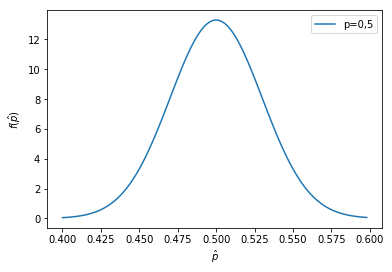

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0.4, 0.6, 0.002)
# Média = 0.5, desvio Padrão = 0.03, apenas para ilustar
plt.plot(x_axis, norm.pdf(x_axis,0.5,0.03), label="p=0,5")
plt.xlabel("$\hat{p}$")
plt.ylabel("$f(\hat{p})$")
plt.legend()
plt.show();

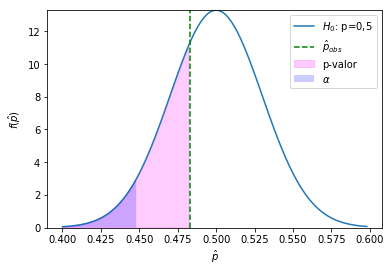

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.colors as clrs

# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0.4, 0.6, 0.002)
# Média = 0.5, desvio Padrão = 0.03, apenas para ilustar
f1_x = norm.pdf(x_axis,0.5,0.03)
plt.plot(x_axis, f1_x, label="$H_0$: p=0,5")
# Média < 0.5, desvio Padrão = 0.03, apenas para ilustar
#f_x = norm.pdf(x_axis,0.42,0.03)
#plt.plot(x_axis, f_x, label="$H_a$: p<0,5")
#define e plota o x crítico (x de corte)
#crit = 0.44
#plt.axvline(x = crit, color = "red", linestyle = "--", label = 'corte')
#define e plota o p_chapeu observado na amostra
estat = 0.483
plt.axvline(x = estat, color = "green", linestyle = "--", label = r'$\hat{p}_{obs}$')
# sombreia a probabilidade p-valor
plt.fill_between(x_axis[x_axis <= estat], f1_x[x_axis <= estat], edgecolor = None,
                 color = clrs.to_rgba(c = (1, 0, 1, 0.2)), label = 'p-valor')
# sombreia a probabilidade de erro tipo 2: beta
#plt.fill_between(x_axis[x_axis >= crit], f_x[x_axis >= crit], 
#                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.2)), zorder = 10, label = r'$\beta$')
# sombreia a probabilidade de erro tipo 1: alpha
plt.fill_between(x_axis[x_axis <= crit], f1_x[x_axis <= crit], 
                 facecolor = clrs.to_rgba(c = (0, 0, 1, 0.2)), zorder = 10, label = r'$\alpha$')
# para o eixo das abscissas (x) cortar o das ordenadas (y) em 0
plt.margins(y = 0)
plt.xlabel("$\hat{p}$")
plt.ylabel("$f(\hat{p})$")
plt.legend()
plt.show();

In [88]:
import math
# cálculo do valor de corte para alfa=0,01
norm.ppf(0.01,0.5,math.sqrt(0.25/379))

0.4402517681615641

In [126]:
import math
import scipy.stats as ss
# cálculo do p-valor
ss.norm.cdf(0.48285,0.5,math.sqrt(0.25/379))

0.2521466781372441

In [141]:
from statsmodels.stats.proportion import proportions_ztest

count = 183 # nº de indivíduos com X=1 (sucessos)
nobs = 379  # nº de indivíduos na amostra
value = .5  # valor da proporção polacional especificado na hipótese nula

# Gera os resultados do teste de hipóteses para a proporção (usando aproximação da Normal)
# 'smaller' especifica a hipótese alternativa (p<0,5), ou seja, especifica que o sinal da inequação é 'menor' 
# 'prop_var' especifica o método para o cálculo da variância de p_chapeu: no caso, sob H0, é igual a 0,5
proportions_ztest(count, nobs, value, alternative='smaller', prop_var=0.5)  
# Resultado é o valor da estatística do teste (valor Z, da N(0,1)) e o p-valor

(-0.6677651460187691, 0.25214175903600455)

In [135]:
# Estatística do teste é o valor observado na amostra, transformado para a NO(0,1), usado para o cálculo do p-valor
p_chapeu = count/nobs
(p_chapeu-value)/np.sqrt(value*(1-value)/nobs)

-0.6677651460187691

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv("ENEM.csv", sep = ';', na_values = '-', encoding= 'unicode_escape')

# Generate some data for this demonstration.
data1 = df.loc[df.Admin=='Privada', "Média"]
data2 = df.loc[df.Admin=='Estadual', "Média"]

In [114]:
# Teste t de Student (bicaudal) para média de duas populações Normais com variâncias diferentes
stats.ttest_ind(data1,data2, equal_var = False)

Ttest_indResult(statistic=42.06259731624396, pvalue=4.352168658695094e-284)

In [115]:
# Teste t de Student (bicaudal) para média de duas populações Normais com variâncias iguais
stats.ttest_ind(data1,data2)

Ttest_indResult(statistic=42.56684851895187, pvalue=5.4681180107221735e-308)

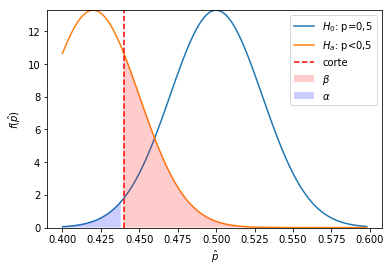

In [140]:
# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0.4, 0.6, 0.002)
# Média = 0.5, desvio Padrão = 0.03, apenas para ilustar (com n maior)
f1_x = norm.pdf(x_axis,0.5,0.03)
plt.plot(x_axis, f1_x, label="$H_0$: p=0,5")
# Média < 0.5, desvio Padrão = 0.03, apenas para ilustar
f_x = norm.pdf(x_axis,0.42,0.03)
plt.plot(x_axis, f_x, label="$H_a$: p<0,5")
#define e plota o x crítico (x de corte)
crit = 0.44
plt.axvline(x = crit, color = "red", linestyle = "--", label = 'corte')
# sombreia a probabilidade de erro tipo 2: beta
plt.fill_between(x_axis[x_axis >= crit], f_x[x_axis >= crit], 
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.2)), zorder = 10, label = r'$\beta$')
# sombreia a probabilidade de erro tipo 1: alpha
plt.fill_between(x_axis[x_axis <= crit], f1_x[x_axis <= crit], 
                 facecolor = clrs.to_rgba(c = (0, 0, 1, 0.2)), zorder = 10, label = r'$\alpha$')
# para o eixo das abscissas (x) cortar o das ordenadas (y) em 0
plt.margins(y = 0)
plt.xlabel("$\hat{p}$")
plt.ylabel("$f(\hat{p})$")
plt.legend()
plt.show();

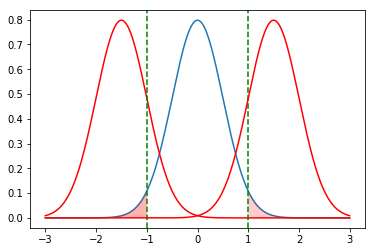

In [168]:
# Eixo x entre -3 e 3 de .002 em .002.
x_axis = np.arange(-3, 3, 0.002)
# Média = 0, desvio Padrão = 0.5, apenas para ilustar (com n maior)
f1_x = norm.pdf(x_axis,0,0.5)
plt.plot(x_axis, f1_x, label="$H_0: \mu_1-\mu_2=0$")
# Média < 0, desvio Padrão = 0.5, apenas para ilustar
f_x = norm.pdf(x_axis,-1.5,0.5)
plt.plot(x_axis, f_x, label="$H_a: \mu_1-\mu_2<0$", color = "red")
#define e plota o x crítico (x de corte)
crit1 = -1
plt.axvline(x = crit1, color = "green", linestyle = "--", label = r'$x_{corte_1}$')
#define e plota o x crítico (x de corte)
crit2 = 1
plt.axvline(x = crit2, color = "green", linestyle = "--", label = r'$x_{corte_2}$')
# Média > 0, desvio Padrão = 0.5, apenas para ilustar
f_x = norm.pdf(x_axis,1.5,0.5)
plt.plot(x_axis, f_x, label="$H_a: \mu_1-\mu_2>0$", color = "red")
# sombreia a probabilidade de erro tipo 1 à direita
plt.fill_between(x_axis[x_axis >= crit2], f1_x[x_axis >= crit2], 
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.2)), zorder = 10, label = r'$\alpha/2$')
# sombreia a probabilidade de erro tipo 1: alpha
plt.fill_between(x_axis[x_axis <= crit1], f1_x[x_axis <= crit1], 
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.3)), zorder = 10, label = r'$\alpha/2$')
#plt.xlabel("$\bar{x}_1-\bar{x}_2$")
#plt.ylabel("$f(\bar{x}_1-\bar{x}_2)$")
#plt.legend()
plt.show();

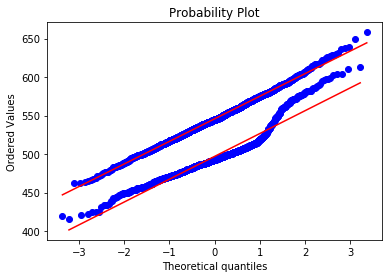

<Figure size 432x288 with 0 Axes>

In [147]:
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
# do ENEM, para o teste t de Student
stats.probplot(data1, plot=plt)
stats.probplot(data2, plot=plt)
fig = plt.figure()

In [11]:
import pandas as pd
# importa dados cotas dos deputados SP
df = pd.read_csv('C:/Users/Mariana/Dropbox (Pessoal)/1º sem 2020/MBA/Dados/Cotas.csv', sep = ';', encoding = 'latin')
df.head(5)

,REEMBOLSO,NOME DO PARLAMENTAR,ANO,SUBQUOTA TRANSLATED,FORNECEDOR,VALOR
0,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,88.16
1,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,121.34
2,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,1274.13
3,0,ALENCAR SANTANA BRAGA,2020,Serviços postais,CORREIOS - SEDEX CONVENCIONAL COM AR-00.000.00...,61.15
4,7002207,ALENCAR SANTANA BRAGA,2020,Combustíveis e lubrificantes,AUTO POSTO NOVO GAMA LTDA-20.168.440/0001-60,111.92


In [12]:
gastos = df[['NOME DO PARLAMENTAR', 'VALOR']] #salvando em "gastos" apenas as variáveis 'NOME DO PARLAMENTAR' e 'VALOR'
# Calcula os gatos por deputado
somas = gastos.groupby("NOME DO PARLAMENTAR",as_index = False)[["NOME DO PARLAMENTAR","VALOR"]].sum() 
somas

,NOME DO PARLAMENTAR,VALOR
0,ABOU ANNI,1483.63
1,ALENCAR SANTANA BRAGA,6736.31
2,ALEX MANENTE,5247.18
3,ALEXANDRE FROTA,19895.61
4,ALEXANDRE LEITE,1245.26
5,ALEXANDRE PADILHA,6157.81
6,ARLINDO CHINAGLIA,10818.96
7,ARNALDO JARDIM,4323.70
8,BALEIA ROSSI,9793.52
9,BRUNA FURLAN,11538.69


Text(0, 0.5, 'frequência')

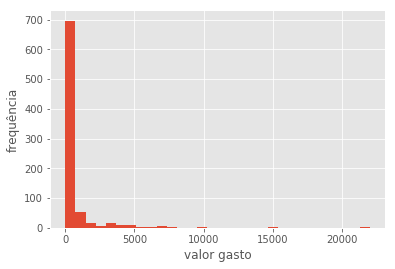

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')     #escolhendo o estilo ggplot para plotar o histograma
plt.hist(gastos['VALOR'], bins = 30)    # gerando o histograma das médias; 
plt.xlabel("valor gasto")  #nome do eixo x
plt.ylabel("frequência")   #nome do eixo y

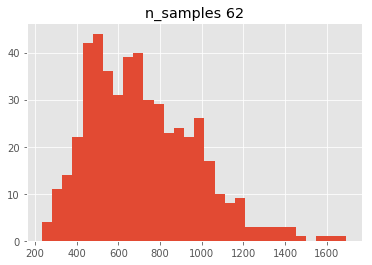

In [14]:
# Será que o número de amostras é o bastante para aproximar a distribuição da média amostral da Normal?
# Aqui faremos um teste gerando amostras bootstrap para ver se converge para uma normal
for n_samples in [62]:
    valor = df[['VALOR']]
    medias = []
    for _ in range(500):
        amostras = df.sample(n_samples,replace=True)['VALOR']
        medias.append(amostras.mean())
    plt.hist(medias, bins = 30)
    plt.title('n_samples %d' % n_samples)
    plt.show()

In [16]:
# Calculando o erro padrão da média amostral
np.std(medias,ddof=1)

256.2641426164166